In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
# simulation problem 17
n = 1000
p = 0.0034
m = 3000


def edge_counter(n, p):
    ans = 0
    A = [[0] * n for i in range(n)]
    for i in range(0, n):
        A[i][i] = 1
        for j in range(0, i):
            A[i][j] = bernoulli.rvs(p, size=1)
            # A[i][j] = np.random.binomial(1, p, size=1)[0]
            A[j][i] = A[i][j]
            ans += A[i][j]
    return ans


expected = 0
for i in range(0, 10):
    expected += (edge_counter(n, p) / 10)

print("Expected Value:", expected)

error = (expected - m) / expected
print("m error:", error)

Expected Value: [1690.2]
m error: [-0.77493788]


152.0


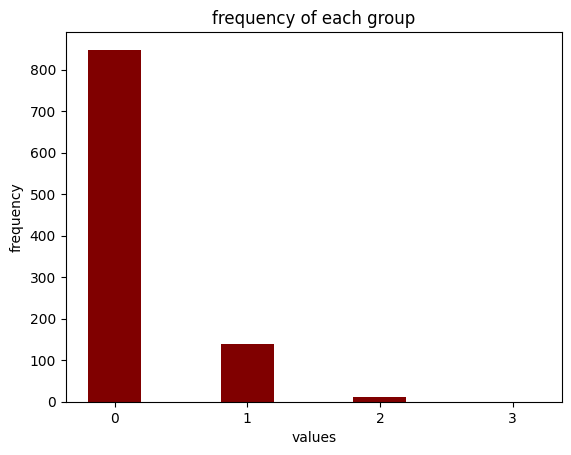

In [6]:
# simulation problem 18
n = 1000
p = 0.00016
mean_cnt = 0
total_arr = np.array([0])

for t in range(10):
    m = 0
    arr = np.array([0] * n)
    for i in range(n):
        for j in range(i + 1, n):
            x = sum(random.choices([True, False], [p, 1 - p], k=1))
            arr[i] = arr[i] + x
            arr[j] += x
            m += x

    l = 2 * m / n
    for r in range(n):
        if (arr[r] > l):
            mean_cnt += 1
    total_arr = np.concatenate((arr, total_arr))
print(mean_cnt / 10)

max_val = total_arr[0]
for i in range(10 * n + 1):
    if (total_arr[i] > max_val):
        max_val = total_arr[i]

x_arr = np.arange(max_val + 1)

y_arr = [0] * (max_val + 1)
for i in total_arr:
    y_arr[i] += 1

y_arr[0] -= 1
y_arr = np.multiply(y_arr, 1 / 10)

plt.bar(x_arr, y_arr, color='maroon', width=0.4)
plt.xticks(x_arr, x_arr)
plt.title('frequency of each group')
plt.xlabel('values')
plt.ylabel('frequency')
plt.show()

In [76]:
# simulation problem 22
n = 50
p = 0.34
def diam_calc(n, p):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0,n)])
    ans = 0
    for i in range(0, n):
        for j in range(0, i):
            if np.random.binomial(1, p, size=1)[0] == 1:
                G.add_edge(i,j)
    return nx.diameter(G)

diams = [0]*100
for i in range(0,100):
    diams[i] = diam_calc(n,p)

np.array(diams).mean()


2.86